In [51]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

In [55]:
class ClassTest:
    reference_contours = {}
    reference_images = {
        "dino_up": "../img/dino_up.png",
        "cactus": "../img/cactus-1.png",
        "fcking_prehistoric_birds": "../img/prehistoric_bird.png"
    }

    min_area = 300
    min_perimeter = 50

    @classmethod
    def get_contour_reference_objects(cls, image):
        img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        blurred_image = cv.medianBlur(img_gray, 1)
        kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        img_sharpened = cv.filter2D(blurred_image, -1, kernel_sharpening)
        eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

        _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)
        
        contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)     
        if contours:
            object_contour = contours[0]
            return object_contour
        else:
            raise ValueError("No contour found in the image.")

    @classmethod
    def initialize_reference_contours(cls):
        print("Initializing reference contours...")
        """Carrega e processa as imagens de referência, armazenando seus contornos."""
        for name, path in cls.reference_images.items():
            print(f"Loading reference image: {path}")
            cv_image = cv.imread(path)
            if cv_image is not None:
                cls.reference_contours[name] = cls.get_contour_reference_objects(cv_image)
            else:
                raise FileNotFoundError(f"Error: Image {path} not found or could not be loaded.")

    
    def show_contours():
        images = {}
        for name, path in ClassTest.reference_images.items():
            images[name] = cv.imread(path)
            
            fig, ax = plt.subplots(figsize=(1, 1))
            ax.imshow(images[name])
            ax.set_title(name)
            ax.axis('off')
            plt.show()
             
        list(images.keys())
                    
        for name, contour in ClassTest.reference_contours.items():
            print(f"Nome: {name}")
            canvas = np.zeros_like(images[name])
            cv.drawContours(canvas, [contour], -1, (255, 255, 255), thickness=2)

            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(canvas)
            ax.set_title('Contour')
            ax.axis('off')
            plt.show()

In [56]:
ClassTest.initialize_reference_contours()

Initializing reference contours...
Loading reference image: ../img/dino_up.png
Loading reference image: ../img/cactus-1.png
Loading reference image: ../img/prehistoric_bird.png


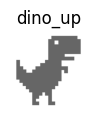

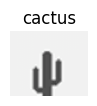

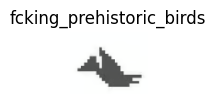

Nome: dino_up


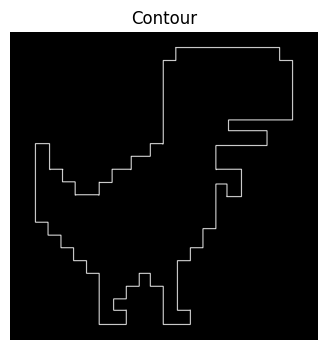

Nome: cactus


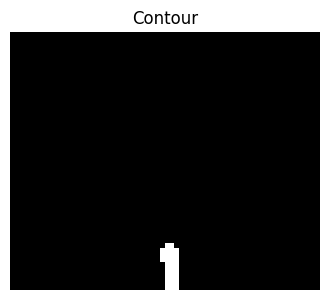

Nome: fcking_prehistoric_birds


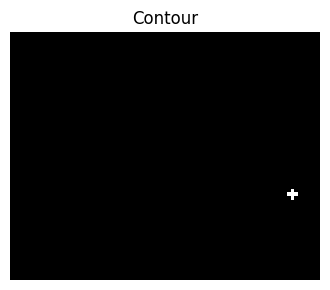

In [57]:
ClassTest.show_contours()